# Stock Exchange Data Analysis

In [12]:
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split

# Load the stock data.
data = pandas.read_csv("data/index_processed.csv")
# Check whether the data has been loaded correctly.
print(data.head())
print(data.tail())


  Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013  
2  2552.399902     0.0  331.811987  
3  2583.899902     0.0  335.906987  
4  2607.100098     0.0  338.923013  
          Index        Date         Open         High          Low  \
104219  J203.JO  2021-05-25  66054.92188  66812.45313  66022.97656   
104220  J203.JO  2021-05-26  66076.67969  66446.36719  66030.35156   
104221  J203.JO  2021-05-27  66108.22656  66940.25000  66102.54688   
104222  J203.JO  2021-05-28  66940.25000  67726

In [3]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}
# Generate a training and test data set for each index.
train_test_per_index = {}
for key, value in data_frames_per_index.items():
    training_data, test_data = train_test_split(value, train_size=0.8)
    train_test_per_index[key] = [training_data, test_data]

# Check whether the data has been parsed properly.
print(train_test_per_index.keys())
# Check whether the training and test data sets have been generated properly.
print("NYA Training Data:")
print(train_test_per_index["NYA"][0][["Index", "Date", "Adj Close"]].tail())
print("\nNYA Test Data:")
print(train_test_per_index["NYA"][1][["Index", "Date", "Adj Close"]].tail())


dict_keys(['000001.SS', '399001.SZ', 'GDAXI', 'GSPTSE', 'HSI', 'IXIC', 'J203.JO', 'N100', 'N225', 'NSEI', 'NYA', 'SSMI', 'TWII'])
NYA Training Data:
      Index        Date     Adj Close
18726   NYA  2006-08-29   8383.639648
20732   NYA  2014-08-19  10929.660160
8737    NYA  1966-12-20    465.670013
19307   NYA  2008-12-18   5617.759766
18849   NYA  2007-02-27   9088.650391

NYA Test Data:
      Index        Date     Adj Close
8530    NYA  1966-02-24    522.450012
20154   NYA  2012-05-01   8164.040039
12136   NYA  1980-07-21    741.219971
21290   NYA  2016-11-03  10307.639650
21882   NYA  2019-03-15  12715.769530


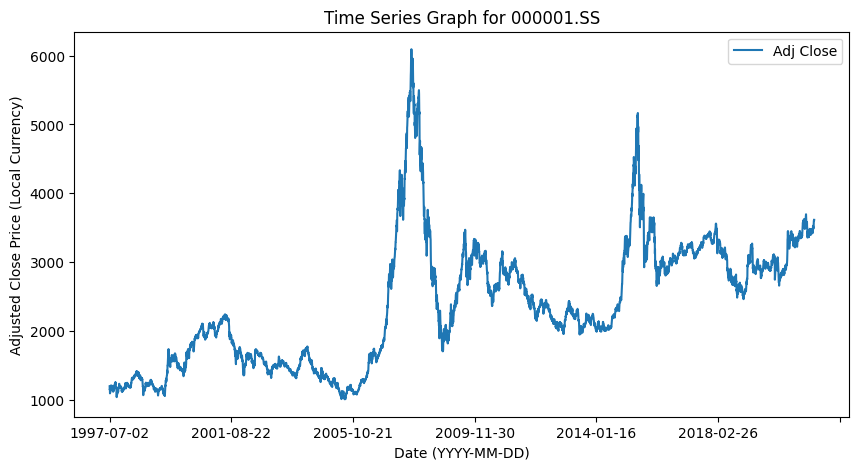

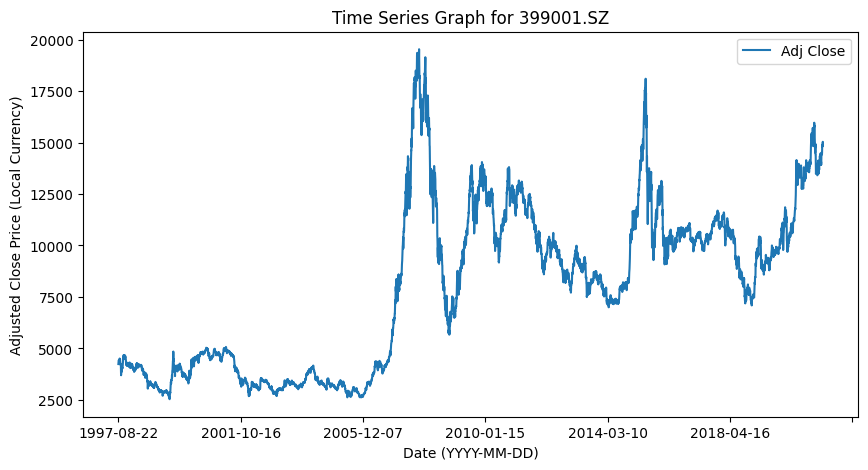

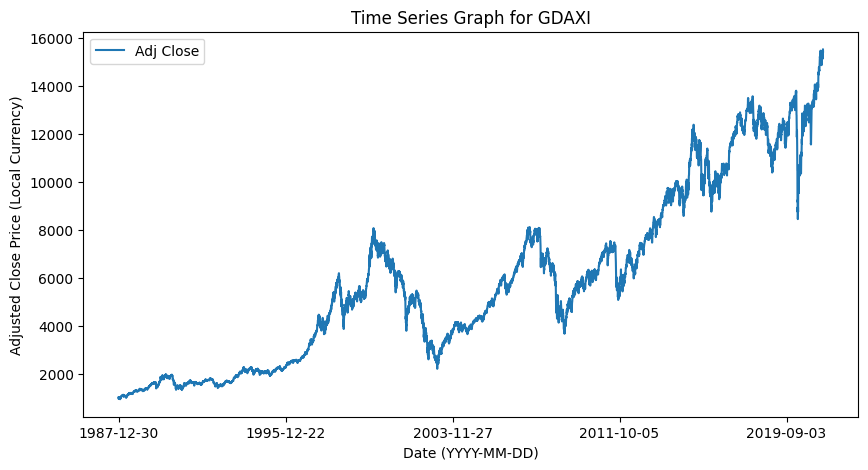

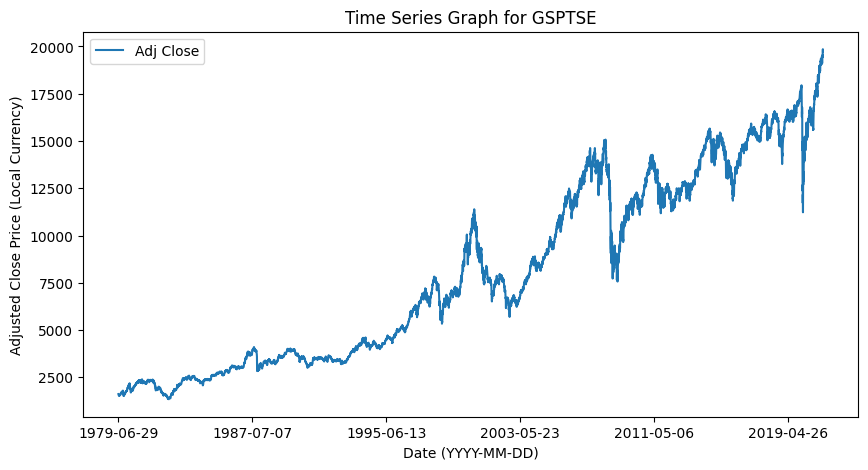

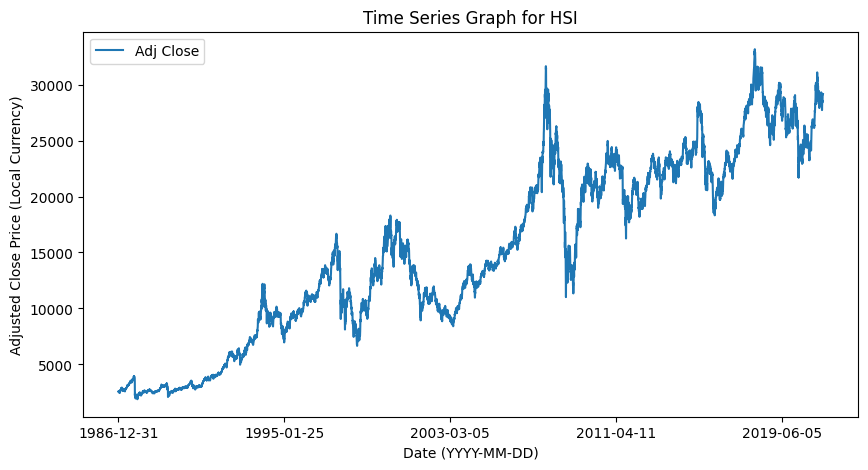

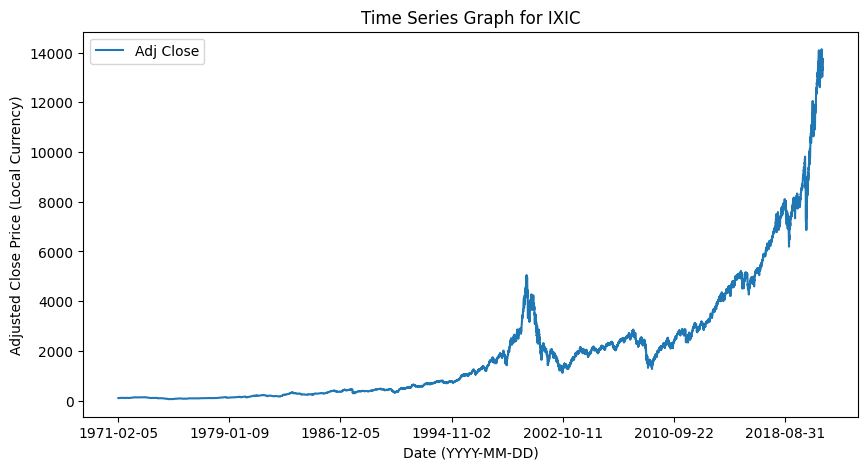

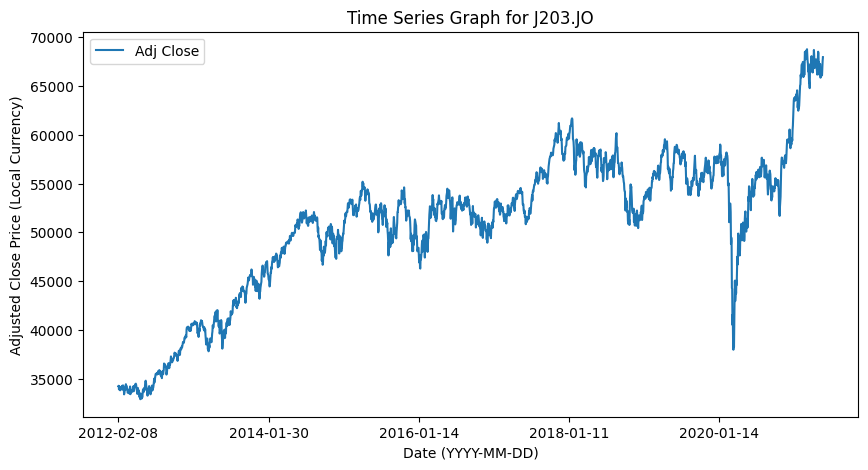

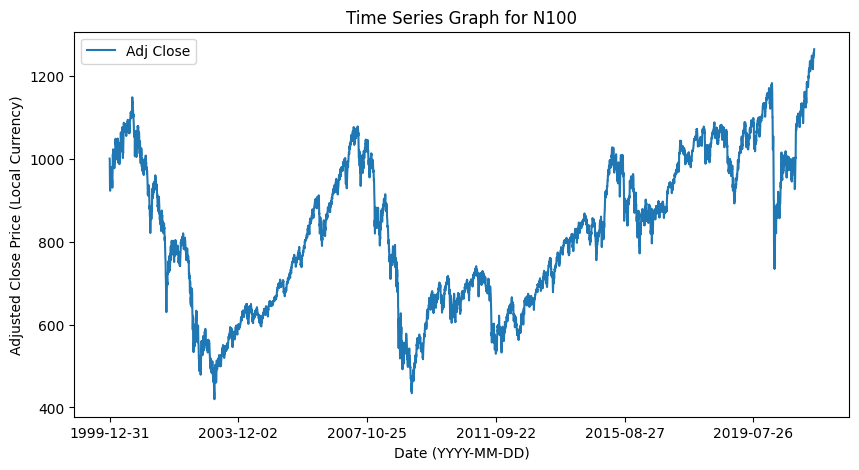

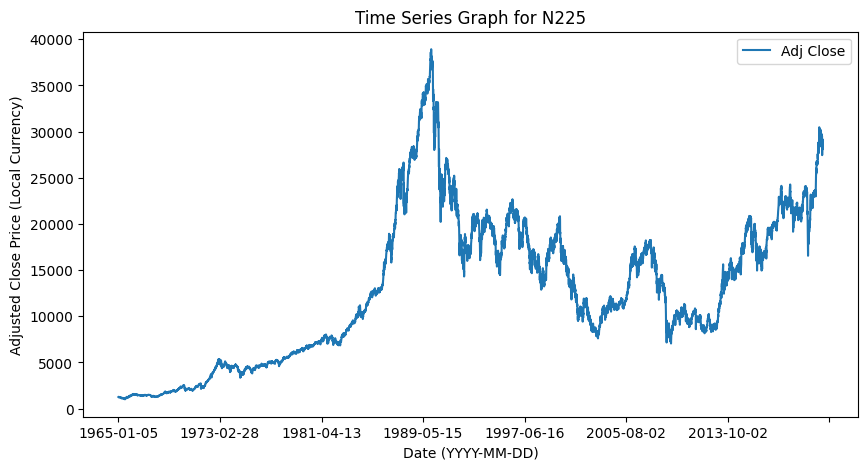

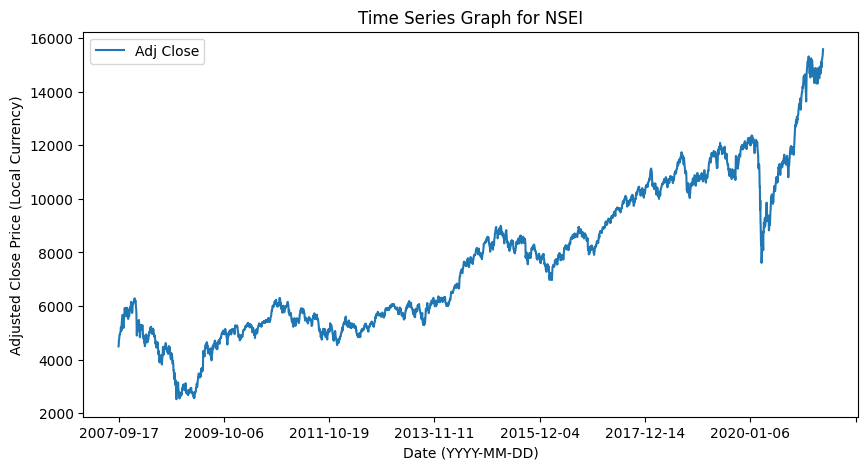

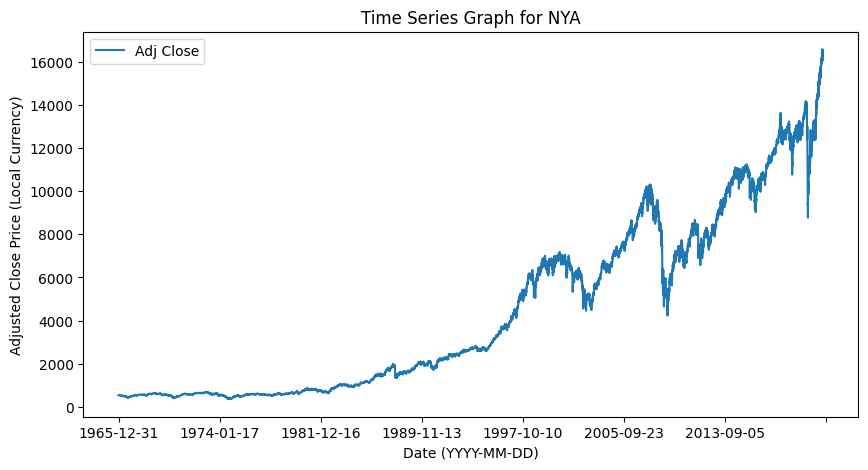

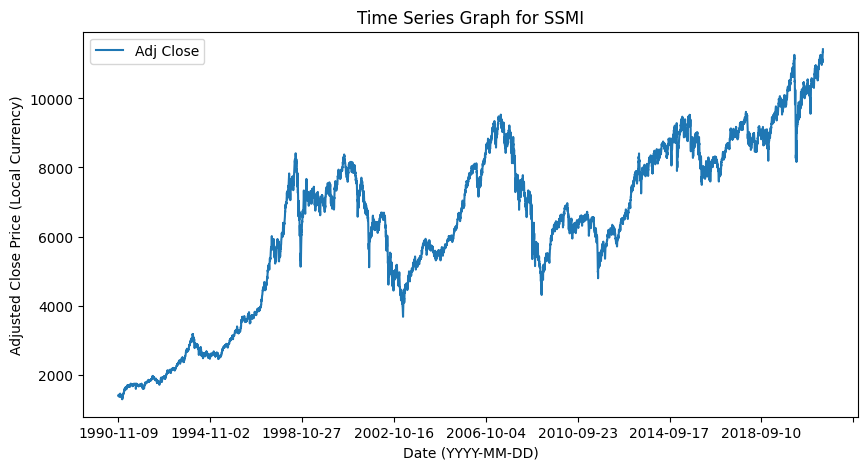

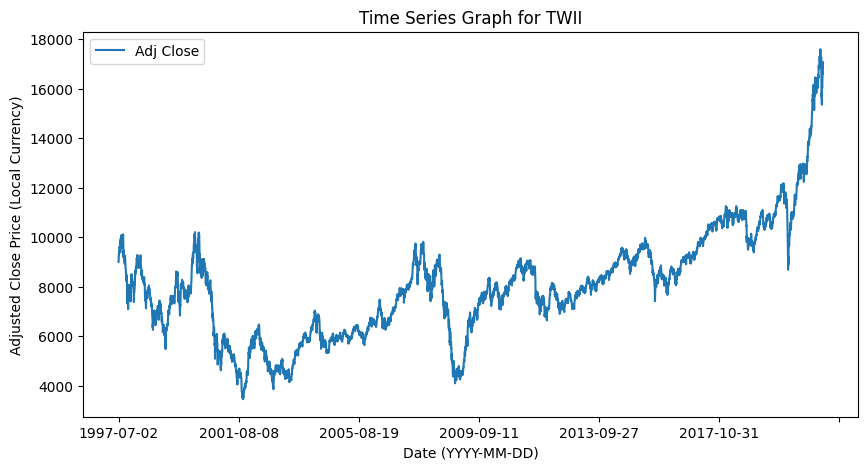

In [56]:
# Generate a time series graph for each index.
for index in train_test_per_index.keys():
    index_data = data.loc[data["Index"] == index]
    index_data.plot(
        x="Date",
        y="Adj Close",
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Time Series Graph for {index}",
        figsize=(10, 5),
    )


<AxesSubplot: title={'center': 'NYA Time Series Graph with Moving Averages'}, xlabel='Date (YYYY-MM-DD)', ylabel='Close Price (USD)'>

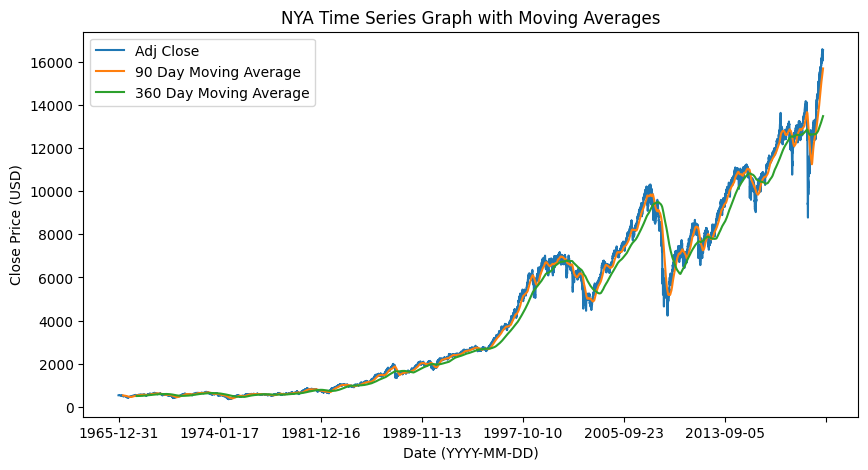

In [55]:
# Perform moving average to reduce noise in the graph for NYA.
nya_data = data_frames_per_index["NYA"]
# Increasing the window size smooths the data, but reduces the accuracy.
nya_data["90 Day Moving Average"] = nya_data["Adj Close"].rolling(90).mean()
nya_data["360 Day Moving Average"] = nya_data["Adj Close"].rolling(360).mean()
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "90 Day Moving Average",
        "360 Day Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Close Price (USD)",
    title="NYA Time Series Graph with Moving Averages",
    figsize=(10, 5),
)
